In [ ]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

!pip install tensorflow
!pip install keras
!pip install keras.utils
import tensorflow as tf

np.random.seed(1234)

     |████████████████████████████████| 462 kB 5.2 MB/s 
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=87b55245e1066ce2b50e31bb08fcc85d467f3869308803e4dffcb4768e3fc53d
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


# Loading libraries

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.layers import (BatchNormalization)
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from IPython.display import SVG
from keras.regularizers import l2, l1, l1_l2


from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import string
import plotly.graph_objs as go
#import plotly.figure_factory as ff
#from plotly import tools
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)

# Load dataset with tensor

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

x_train

(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
# data preprocessing
def data_preprocessing(x):
    #out_y = keras.utils.to_categorical(raw.label, num_classes=10)
    num_images = x.shape[0]
    print(x.shape[0])
    print(x.shape[1])
    print(x.shape[2])
    x = x[:,:,:, None]
    print(x.shape)
    #x_as_array = x.values[:,1:]
    #x_shaped_array = x_as_array.reshape(num_images, img_height, img_width, 1)
    #out_x = x_shaped_array / 255
    return x

In [ ]:
X_train = data_preprocessing(x_train)
X_test = data_preprocessing(x_test)

60000
28
28
(60000, 28, 28, 1)
10000
28
28
(10000, 28, 28, 1)


In [ ]:
y_train.shape

(60000,)

# Data Normalization

In [ ]:
# normalize train and test from 0-1 scale
x_train_norm, x_test_norm = X_train/255.0, X_test/255.0;
#x_train_norm

# Baseline CNN model

In [59]:
# Model
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(BatchNormalization())

cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))

#cnn.add(Dense(128, activation='relu'))
#cnn.add(BatchNormalization())
#cnn.add(Dropout(0.5))


cnn.add(Dense(10, activation='softmax'))

In [60]:
opt = SGD(lr=0.01, momentum=0.95, name='adam')

In [61]:
#model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
cnn.compile(optimizer=opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [62]:
#model.summary()
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_15 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_16 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 64)       

## Training Model

In [63]:
history = cnn.fit(x_train_norm, y_train,
                  batch_size=256,
                  epochs=50,
                  validation_data=(x_test_norm, y_test))

Epoch 1/50
235/235 [==============================] - 8s 29ms/step - loss: 0.6622 - accuracy: 0.7642 - val_loss: 2.1521 - val_accuracy: 0.3629
Epoch 2/50
235/235 [==============================] - 6s 28ms/step - loss: 0.4219 - accuracy: 0.8492 - val_loss: 0.7160 - val_accuracy: 0.7494
Epoch 3/50
235/235 [==============================] - 7s 28ms/step - loss: 0.3599 - accuracy: 0.8714 - val_loss: 0.3324 - val_accuracy: 0.8810
Epoch 4/50
235/235 [==============================] - 7s 28ms/step - loss: 0.3208 - accuracy: 0.8868 - val_loss: 0.2995 - val_accuracy: 0.8957
Epoch 5/50
235/235 [==============================] - 7s 28ms/step - loss: 0.2876 - accuracy: 0.8977 - val_loss: 0.2854 - val_accuracy: 0.8952
Epoch 6/50
235/235 [==============================] - 7s 28ms/step - loss: 0.2700 - accuracy: 0.9028 - val_loss: 0.2748 - val_accuracy: 0.9013
Epoch 7/50
235/235 [==============================] - 7s 28ms/step - loss: 0.2518 - accuracy: 0.9099 - val_loss: 0.2505 - val_accuracy: 0.9089

## Model shape

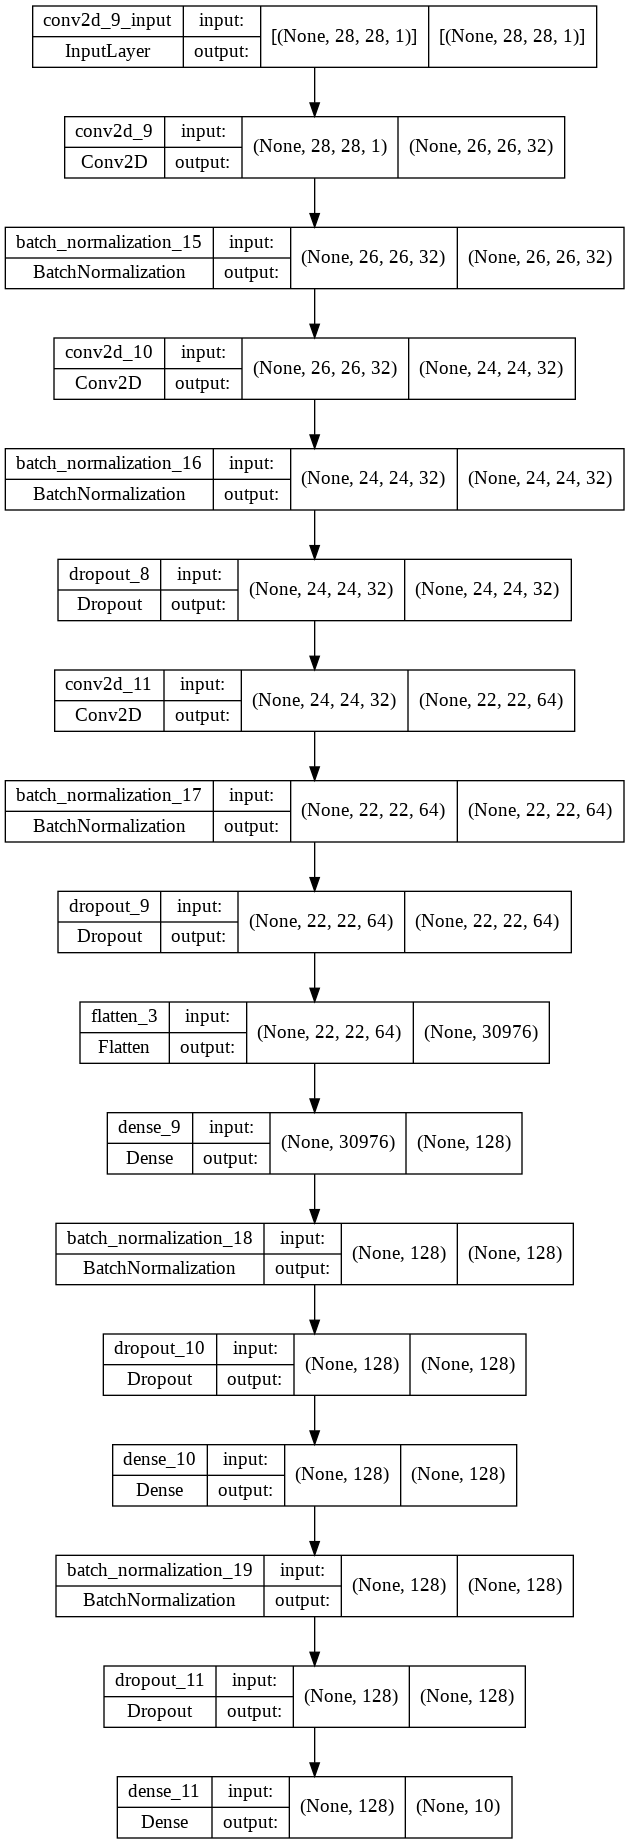

In [64]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

In [65]:
score = cnn.evaluate(x_test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.28760412335395813
Test accuracy: 0.9297000169754028


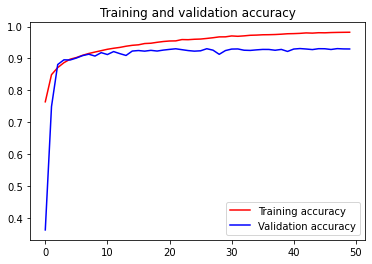

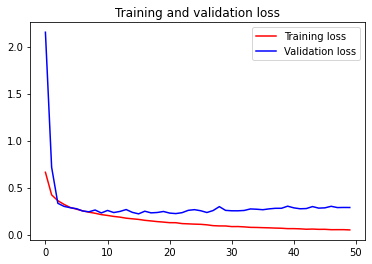

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()




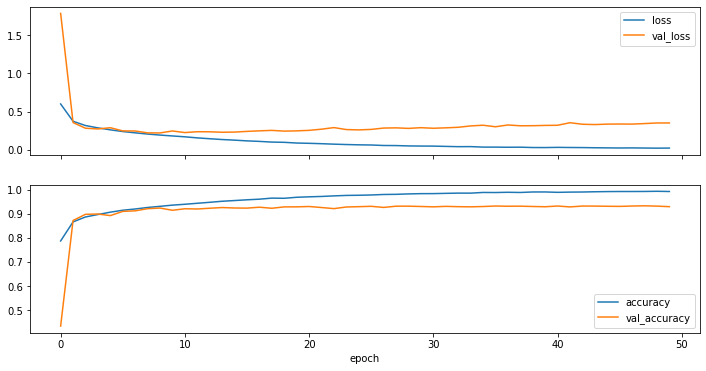

In [ ]:
history_df = pd.DataFrame(history.history)
history_df["epoch"] = history.epoch
fig, (ax0,ax1) = plt.subplots(nrows=2, sharex=True, figsize=(12, 6))
history_df.plot(x= "epoch", y =["loss", "val_loss"], ax=ax0)
history_df.plot(x="epoch", y=["accuracy", "val_accuracy"], ax= ax1);

## Save and Load Model

In [ ]:
PATH = './cnn.pth'
#torch.save(cnn.state_dict(), PATH)
# Calling `save('my_model')` creates a SavedModel folder `my_model`.
cnn.save(PATH)

# It can be used to reconstruct the model identically.
reconstructed_model = keras.models.load_model(PATH)


#np.testing.assert_allclose(
#    cnn.predict(x_test_norm), reconstructed_model.predict(x_test_norm)
#)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
#reconstructed_model.fit(x_train_norm, y_train)


INFO:tensorflow:Assets written to: ./cnn.pth/assets


In [ ]:
#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)
print(y_train)

(60000,)
(10000,)
[9 0 0 ... 3 0 5]


## Different optimizer effect on baseline model

Epoch 1/50
235/235 [==============================] - 8s 28ms/step - loss: 0.0429 - accuracy: 0.9849 - val_loss: 0.2776 - val_accuracy: 0.9320
Epoch 2/50
235/235 [==============================] - 6s 28ms/step - loss: 0.0404 - accuracy: 0.9855 - val_loss: 0.2771 - val_accuracy: 0.9319
Epoch 3/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0390 - accuracy: 0.9865 - val_loss: 0.2794 - val_accuracy: 0.9325
Epoch 4/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0372 - accuracy: 0.9870 - val_loss: 0.2781 - val_accuracy: 0.9325
Epoch 5/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0347 - accuracy: 0.9880 - val_loss: 0.2774 - val_accuracy: 0.9328
Epoch 6/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0366 - accuracy: 0.9873 - val_loss: 0.2789 - val_accuracy: 0.9331
Epoch 7/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 0.2797 - val_accuracy: 0.9338

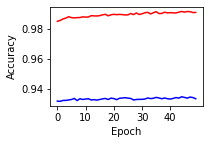

<Figure size 4320x4320 with 0 Axes>

Epoch 1/50
235/235 [==============================] - 9s 31ms/step - loss: 0.1334 - accuracy: 0.9548 - val_loss: 0.2838 - val_accuracy: 0.9143
Epoch 2/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1256 - accuracy: 0.9566 - val_loss: 0.2451 - val_accuracy: 0.9225
Epoch 3/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1143 - accuracy: 0.9597 - val_loss: 0.2788 - val_accuracy: 0.9063
Epoch 4/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1119 - accuracy: 0.9614 - val_loss: 0.2476 - val_accuracy: 0.9231
Epoch 5/50
235/235 [==============================] - 7s 30ms/step - loss: 0.1013 - accuracy: 0.9643 - val_loss: 0.2638 - val_accuracy: 0.9090
Epoch 6/50
235/235 [==============================] - 7s 31ms/step - loss: 0.0991 - accuracy: 0.9658 - val_loss: 0.2605 - val_accuracy: 0.9138
Epoch 7/50
235/235 [==============================] - 7s 31ms/step - loss: 0.0918 - accuracy: 0.9687 - val_loss: 0.2462 - val_accuracy: 0.9165

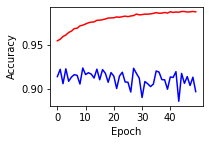

<Figure size 4320x4320 with 0 Axes>

Epoch 1/50
235/235 [==============================] - 8s 30ms/step - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.2754 - val_accuracy: 0.9155
Epoch 2/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.2786 - val_accuracy: 0.9142
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0285 - accuracy: 0.9903 - val_loss: 0.2735 - val_accuracy: 0.9165
Epoch 4/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.2708 - val_accuracy: 0.9180
Epoch 5/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.2699 - val_accuracy: 0.9183
Epoch 6/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.2739 - val_accuracy: 0.9170
Epoch 7/50
235/235 [==============================] - 7s 28ms/step - loss: 0.0288 - accuracy: 0.9905 - val_loss: 0.2725 - val_accuracy: 0.9168

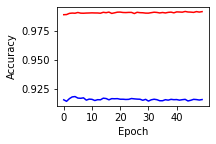

<Figure size 4320x4320 with 0 Axes>

Epoch 1/50
235/235 [==============================] - 8s 31ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.2613 - val_accuracy: 0.9187
Epoch 2/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0396 - accuracy: 0.9873 - val_loss: 0.3001 - val_accuracy: 0.9116
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.2678 - val_accuracy: 0.9182
Epoch 4/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.2796 - val_accuracy: 0.9091
Epoch 5/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0337 - accuracy: 0.9884 - val_loss: 0.2709 - val_accuracy: 0.9110
Epoch 6/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.2576 - val_accuracy: 0.9206
Epoch 7/50
235/235 [==============================] - 7s 29ms/step - loss: 0.0348 - accuracy: 0.9881 - val_loss: 0.2726 - val_accuracy: 0.9133

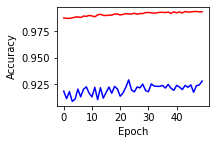

<Figure size 4320x4320 with 0 Axes>

In [67]:
opts = ['sgd', 'rmsprop', 'adagrad', 'adam']

for i in range(len(opts)):
  plot_no = 220+(i+1)
  plt.subplot(plot_no)
  #opt = SGD(lr=0.01, momentum=0.9, name=opts[i]) 
  cnn.compile(optimizer= opts[i], loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  history = cnn.fit(x_train_norm, y_train, batch_size=256, epochs=50, validation_data=(x_test_norm, y_test))
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(accuracy))
  plt.plot(epochs, accuracy, 'r', label='Training accuracy with '+opts[i])
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy '+opts[i])
  #plt.title('Training and validation accuracy with different optimizers')
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.xticks(np.arange(0, 50, step=10))
  #plt.legend()
  plt.figure(figsize=[60,60])
  #plt.plot(epochs, loss, 'r', label='Training loss')
  #plt.plot(epochs, val_loss, 'b', label='Validation loss')
  #plt.title('Training and validation loss')
  #plt.legend()
  plt.show()

# Data Augmentation

In [22]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images


In [23]:
datagen.fit(x_train_norm)

In [52]:

new_history = cnn.fit_generator(datagen.flow(x_train_norm,y_train, batch_size=256),
                  epochs=50,
                  validation_data=(x_test_norm, y_test))

Epoch 1/50
235/235 [==============================] - 20s 85ms/step - loss: 0.2410 - accuracy: 0.9139 - val_loss: 0.2121 - val_accuracy: 0.9232
Epoch 2/50
235/235 [==============================] - 19s 82ms/step - loss: 0.2415 - accuracy: 0.9130 - val_loss: 0.2187 - val_accuracy: 0.9197
Epoch 3/50
235/235 [==============================] - 19s 82ms/step - loss: 0.2397 - accuracy: 0.9142 - val_loss: 0.2141 - val_accuracy: 0.9226
Epoch 4/50
235/235 [==============================] - 19s 83ms/step - loss: 0.2409 - accuracy: 0.9143 - val_loss: 0.2033 - val_accuracy: 0.9250
Epoch 5/50
235/235 [==============================] - 19s 83ms/step - loss: 0.2415 - accuracy: 0.9145 - val_loss: 0.2024 - val_accuracy: 0.9266
Epoch 6/50
235/235 [==============================] - 19s 80ms/step - loss: 0.2364 - accuracy: 0.9149 - val_loss: 0.2004 - val_accuracy: 0.9283
Epoch 7/50
235/235 [==============================] - 19s 82ms/step - loss: 0.2356 - accuracy: 0.9165 - val_loss: 0.1943 - val_accuracy:

## Evaluating the model on Augmented Data 

In [57]:
new_score = cnn.evaluate(x_test_norm, y_test)

print('Loss: {:.4f}'.format(new_score[0]))
print('Accuracy: {:.4f}'.format(new_score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.2773 - accuracy: 0.9390
Loss: 0.2773
Accuracy: 0.9390


## Evaluating model with unnormalized data

In [58]:
new_score = cnn.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(new_score[0]))
print('Accuracy: {:.4f}'.format(new_score[1]))

313/313 [==============================] - 1s 5ms/step - loss: 229736.0312 - accuracy: 0.1797
Loss: 229736.0312
Accuracy: 0.1797


# Using l2 Regularization on baseline model


In [27]:
# Model
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) , activation='relu', input_shape=(28, 28, 1)))
cnn1.add(BatchNormalization())

cnn1.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.25))

cnn1.add(Flatten())
cnn1.add(Dense(512,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

cnn1.add(Dense(128,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn1.add(BatchNormalization())
cnn1.add(Dropout(0.5))

#cnn1.add(Dense(128, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) , activation='relu'))
#cnn1.add(BatchNormalization())
#cnn1.add(Dropout(0.5))


cnn1.add(Dense(10, activation='softmax'))

In [28]:
opt = SGD(lr=0.01, momentum=0.95, name='adam') 
cnn1.compile(optimizer=opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [29]:
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)       

In [30]:
history = cnn1.fit(x_train_norm, y_train,
                  batch_size=256,
                  epochs=50,
                  validation_data=(x_test_norm, y_test))

Epoch 1/50
235/235 [==============================] - 10s 36ms/step - loss: 7.7136 - accuracy: 0.7997 - val_loss: 5.0373 - val_accuracy: 0.1000
Epoch 2/50
235/235 [==============================] - 8s 34ms/step - loss: 1.6217 - accuracy: 0.8685 - val_loss: 1.9451 - val_accuracy: 0.5483
Epoch 3/50
235/235 [==============================] - 8s 34ms/step - loss: 0.8508 - accuracy: 0.8798 - val_loss: 1.5995 - val_accuracy: 0.5960
Epoch 4/50
235/235 [==============================] - 8s 35ms/step - loss: 0.7604 - accuracy: 0.8827 - val_loss: 0.8605 - val_accuracy: 0.8407
Epoch 5/50
235/235 [==============================] - 8s 35ms/step - loss: 0.7403 - accuracy: 0.8887 - val_loss: 1.4985 - val_accuracy: 0.6442
Epoch 6/50
235/235 [==============================] - 8s 35ms/step - loss: 0.7577 - accuracy: 0.8880 - val_loss: 0.8816 - val_accuracy: 0.8483
Epoch 7/50
235/235 [==============================] - 8s 35ms/step - loss: 0.7693 - accuracy: 0.8903 - val_loss: 1.1964 - val_accuracy: 0.761

## Model shape

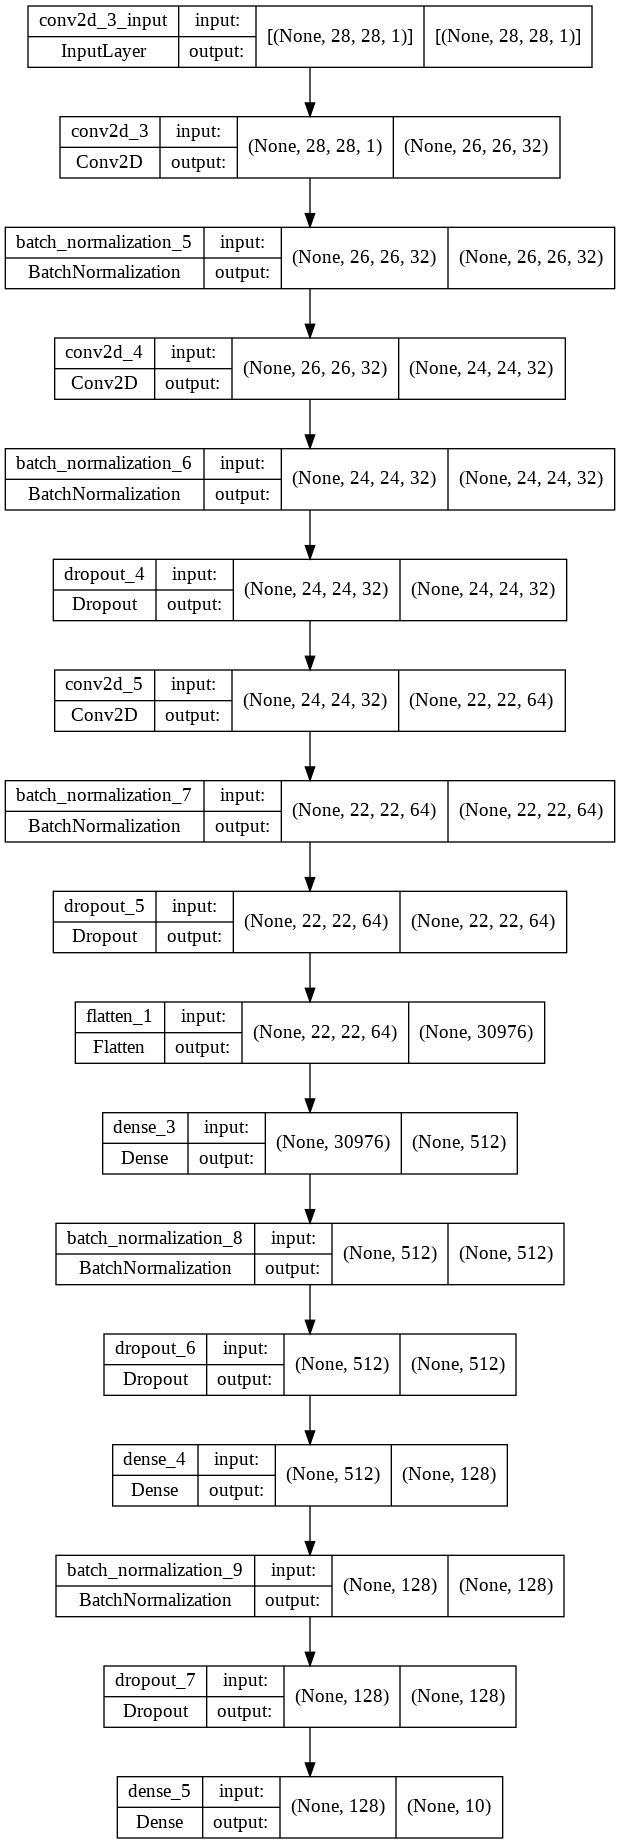

In [31]:
tf.keras.utils.plot_model(cnn1, show_shapes=True)

## Model evaluation

In [32]:
score1 = cnn1.evaluate(x_test_norm, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.9005832076072693
Test accuracy: 0.8967000246047974


# Using l2 Regularization on Augmeted, Normalized data

In [33]:
opt = SGD(lr=0.01, momentum=0.95, name='adam') 
cnn1.compile(optimizer=opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = cnn1.fit_generator(datagen.flow(x_train_norm,y_train, batch_size=256),
                  epochs=50,
                  validation_data=(x_test_norm, y_test))

Epoch 1/50
235/235 [==============================] - 21s 82ms/step - loss: 1.4287 - accuracy: 0.7735 - val_loss: 1.0921 - val_accuracy: 0.8546
Epoch 2/50
235/235 [==============================] - 19s 81ms/step - loss: 1.1961 - accuracy: 0.8053 - val_loss: 1.1476 - val_accuracy: 0.8283
Epoch 3/50
235/235 [==============================] - 19s 83ms/step - loss: 1.1752 - accuracy: 0.8097 - val_loss: 1.1867 - val_accuracy: 0.7906
Epoch 4/50
235/235 [==============================] - 20s 84ms/step - loss: 1.1665 - accuracy: 0.8104 - val_loss: 1.0686 - val_accuracy: 0.8479
Epoch 5/50
235/235 [==============================] - 19s 82ms/step - loss: 1.1645 - accuracy: 0.8132 - val_loss: 1.0493 - val_accuracy: 0.8613
Epoch 6/50
235/235 [==============================] - 19s 83ms/step - loss: 1.1559 - accuracy: 0.8126 - val_loss: 1.1116 - val_accuracy: 0.8208
Epoch 7/50
235/235 [==============================] - 20s 84ms/step - loss: 1.1596 - accuracy: 0.8129 - val_loss: 1.1630 - val_accuracy:

## Plot result of regularization




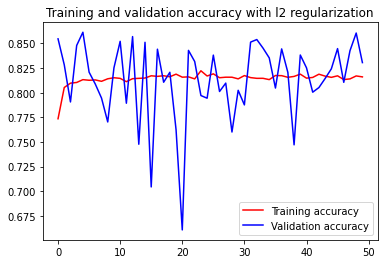

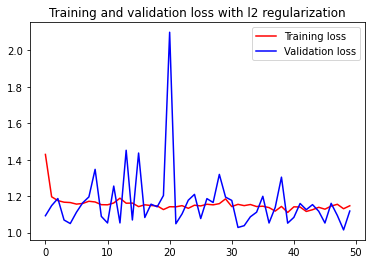

In [34]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with l2 regularization')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss with l2 regularization')
plt.legend()
plt.show()

# Baseline model without Dropout Layers

In [35]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) , activation='relu', input_shape=(28, 28, 1)))
cnn2.add(BatchNormalization())

cnn2.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn2.add(BatchNormalization())
#cnn1.add(Dropout(0.25))

cnn2.add(Conv2D(64, kernel_size=(3, 3), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn2.add(BatchNormalization())
#cnn1.add(Dropout(0.25))

cnn2.add(Flatten())
cnn2.add(Dense(512,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn2.add(BatchNormalization())
#cnn1.add(Dropout(0.5))

cnn2.add(Dense(128,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
cnn2.add(BatchNormalization())
#cnn1.add(Dropout(0.5))


cnn2.add(Dense(10, activation='softmax'))

In [36]:
opt = SGD(lr=0.01, momentum=0.95, name='adam') 
cnn2.compile(optimizer=opt, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [37]:
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_12 (Bat  (None, 22, 22, 64)      

In [38]:
history = cnn2.fit(x_train_norm, y_train,
                  batch_size=256,
                  epochs=50,
                  validation_data=(x_test_norm, y_test))

Epoch 1/50
235/235 [==============================] - 9s 33ms/step - loss: 7.1086 - accuracy: 0.8581 - val_loss: 5.2212 - val_accuracy: 0.1000
Epoch 2/50
235/235 [==============================] - 7s 32ms/step - loss: 1.3331 - accuracy: 0.8964 - val_loss: 1.9508 - val_accuracy: 0.5429
Epoch 3/50
235/235 [==============================] - 8s 32ms/step - loss: 0.5745 - accuracy: 0.9036 - val_loss: 0.9710 - val_accuracy: 0.7184
Epoch 4/50
235/235 [==============================] - 8s 32ms/step - loss: 0.4902 - accuracy: 0.9047 - val_loss: 0.8293 - val_accuracy: 0.7900
Epoch 5/50
235/235 [==============================] - 8s 34ms/step - loss: 0.4681 - accuracy: 0.9111 - val_loss: 0.7689 - val_accuracy: 0.7979
Epoch 6/50
235/235 [==============================] - 8s 32ms/step - loss: 0.4760 - accuracy: 0.9110 - val_loss: 0.8445 - val_accuracy: 0.8008
Epoch 7/50
235/235 [==============================] - 8s 32ms/step - loss: 0.4786 - accuracy: 0.9150 - val_loss: 0.5706 - val_accuracy: 0.8793

In [39]:
print(history.params)

{'verbose': 1, 'epochs': 50, 'steps': 235}


# Plot of Accuracy and loss with no dropout layers

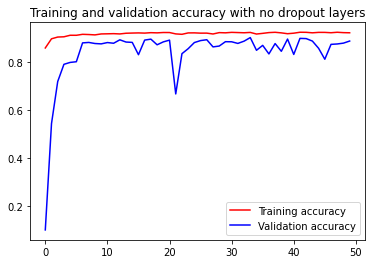

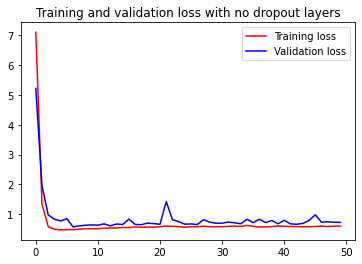

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy with no dropout layers')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss with no dropout layers')
plt.legend()
plt.show()

In [41]:
label = {0:"T-shirt/top",
1 :"Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}
colms =  ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [42]:
df_train = pd.read_csv("https://www.cs.mcgill.ca/~aislam18/backup/fashion-mnist_train.csv")

In [43]:
df_test = pd.read_csv("https://www.cs.mcgill.ca/~aislam18/backup/fashion-mnist_test.csv")

In [44]:
df_train.shape

(60000, 785)

In [45]:
l1 =[j for i,j in label.items()]
l1


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [46]:
l2 = df_train.label.value_counts()
fig = go.Figure(data=[go.Pie(labels=l1, values=l2.values)])
fig.update_traces(title = "Distribution of Classes in Train_set")
fig.update_traces(hoverinfo ='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [47]:
l2 = df_test.label.value_counts()
fig = go.Figure(data=[go.Pie(labels=l1, values=l2.values)])
fig.update_traces(title = "Distribution of Classes in test_set")
fig.update_traces(hoverinfo ='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=2)))
fig.show()

In [48]:
X_train = df_train.drop("label",axis=1)
Y_train = df_train["label"]

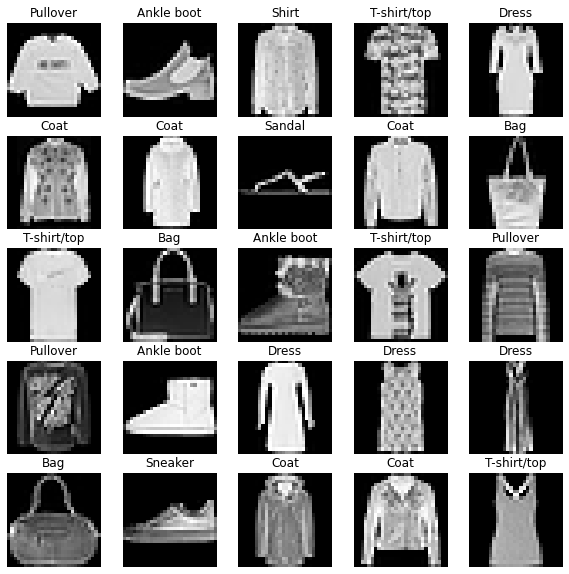

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train.iloc[i].values.reshape((28,28)),cmap="gray")
    index = int(Y_train[i])
    plt.axis("off")
    plt.title(colms[index])
plt.show()    

In [50]:
#X_test = df_test.drop("label",axis=1)
#Y_test = df_test["label"]

In [51]:
#Y_pred = cnn.predict(x_test) # x-test shape is (_, 28,28)
#Y_pred_classes = np.argmax(Y_pred,axis=1)
#Y_true = np.argmax(y_test,axis=0)